Data Analysis Lab 2 Solution
---------------------

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import urllib
%matplotlib inline 
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sb
%load_ext autoreload

### CUG implementation
Includes the following functions:
    * test_cug_numeric(gr, n, attr)
    * test_cug_attribute(gr, n, attr)
    * plot_cug(result)
    * ptest_cug(result)
    
Note that attribute must be numeric and that a mixing matrix will be computed, so the scale matters.

In [2]:
%autoreload
from cug import test_cug_numeric, test_cug_attribute, plot_cug, ptest_cug

In [3]:
url = "http://josquin.cti.depaul.edu/~rburke/courses/s14/ga.graphml"

with urllib.request.urlopen(url) as fh:
    ga =nx.read_graphml(fh)


Examine one of the nodes. These are characters from the "Grey's Anatomy" TV show. The edges are romantic relationships that occurred over the course of the show.

In [4]:
list(ga.nodes(data=True))[0]

('n0',
 {'birthyear': 1967.0,
  'na': False,
  'position': 'Attending',
  'race': 'White',
  'season': 1.0,
  'sex': 'F',
  'sign': 'Libra',
  'vertex.names': 'addison'})

1. Plot network with labels and the male nodes blue and female nodes red.

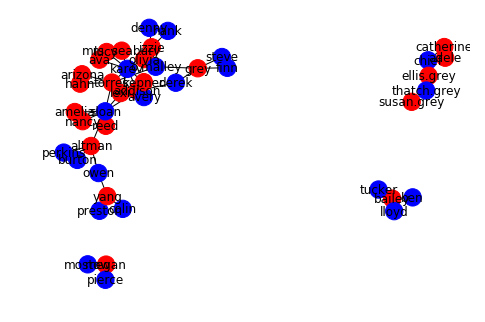

In [5]:
colors = ['b' if data['sex'] == 'M' else 'r'
          for node, data in ga.nodes(data=True) ]

labels = {node: data['vertex.names'] for node, data in ga.nodes(data=True) }
nx.draw(ga, with_labels = True, labels = labels, node_color = colors)

2a. Calculate assortativity by race. Test via CUG test.

In [6]:
nx.attribute_assortativity_coefficient(ga,'race')

0.30343622597553876

p > test:  0.0
p < test:  1.0


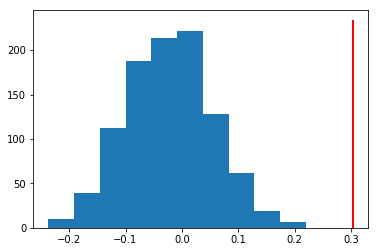

In [7]:
race_cug = test_cug_attribute(ga, 1000, 'race')
ptest_cug(race_cug)
plot_cug(race_cug)

2b. Calculate age and add as an attribute (integer type)

In [8]:
for node,data in ga.nodes(data=True):
    data['age'] = int(2018 - data['birthyear'])

2c. Calculate age assortativity. Test via CUG test.

In [9]:
nx.numeric_assortativity_coefficient(ga,'age')

0.5541374702603958

In [12]:
#negative since it looks for direct matches instead of a coefficient
nx.attribute_assortativity_coefficient(ga,'age')

-0.0692268822637696

p > test:  0.0
p < test:  1.0


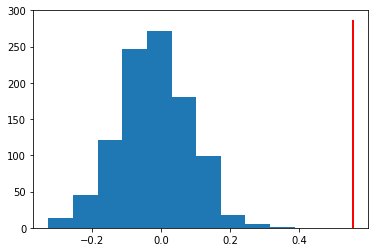

In [13]:
age_cug = test_cug_numeric(ga,1000,'age')
ptest_cug(age_cug)
plot_cug(age_cug)


2d. Calculate degree assortativity

In [14]:
nx.degree_assortativity_coefficient(ga)

-0.22567191844300322

3.0 What does the different assortativity coefficients mean in terms of the relationships represented in the network and the mechanisms of tie formation?

1. Race: The relationships tend to be between individuals of the same race.
1. Age: The relationships tend to be between individuals of the similar ages with a slight tendency to different ages.
1. Degree: Relationships between individuals of different degree are more common. This could be due to new characters joining the series and then hooking up with existing characters with a longer romantic history.

4.0 Create a data frame with all the attribute values. Show the first few rows. head()

In [23]:
names = nx.get_node_attributes(ga, 'vertex.names')
year = nx.get_node_attributes(ga, 'birthyear')
age = nx.get_node_attributes(ga, 'age')
position = nx.get_node_attributes(ga, 'position')
race = nx.get_node_attributes(ga, 'race')
season = nx.get_node_attributes(ga, 'season')
sex = nx.get_node_attributes(ga, 'sex')
sign = nx.get_node_attributes(ga, 'sign')


gadf = pd.DataFrame({'year': year, 'age': age, 'position':position, 
                     "race":race, "season":season, 'sex':sex,
                     'sign': sign, 'names': names } )

In [24]:
gadf.head()

,year,age,position,race,season,sex,sign,names
n0,1967.0,51,Attending,White,1.0,F,Libra,addison
n1,1949.0,69,Non-Staff,Black,2.0,F,Leo,adele
n10,1950.0,68,Attending,Other,8.0,F,Capricorn,catherine
n11,1954.0,64,Chief,Black,1.0,M,Scorpio,chief
n12,1944.0,74,Attending,White,3.0,M,Taurus,colin


5.0 Create Series for degree, betweenness and closeness. Create series objects and add columns to the data frame.

In [26]:
deg = pd.Series(nx.degree_centrality(ga))
bet = pd.Series(nx.betweenness_centrality(ga))
clo = pd.Series(nx.closeness_centrality(ga))

In [28]:
#reference column in the Pandas dataframe you want, and assign a series to it.
#will create a new one if it doesn't exist
gadf['deg'] = deg
gadf['bet'] = bet
gadf['clo'] = clo
gadf.head()

,year,age,position,race,season,sex,sign,names,deg,bet,clo
n0,1967.0,51,Attending,White,1.0,F,Libra,addison,0.069767,0.080362,0.275398
n1,1949.0,69,Non-Staff,Black,2.0,F,Leo,adele,0.023256,0.000000,0.048450
n10,1950.0,68,Attending,Other,8.0,F,Capricorn,catherine,0.023256,0.000000,0.048450
n11,1954.0,64,Chief,Black,1.0,M,Scorpio,chief,0.069767,0.007752,0.072674
n12,1944.0,74,Attending,White,3.0,M,Taurus,colin,0.023256,0.000000,0.125331


6.0 Plot the degree distribution via seaborn

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


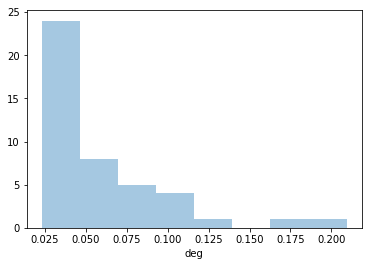

In [29]:
ax = sb.distplot(gadf['deg'] , kde = False)

7a. Create a pair grid plot between the numeric columns. (Drop the 'year' column as it is perfectly anti-correlated with the 'age' column.)

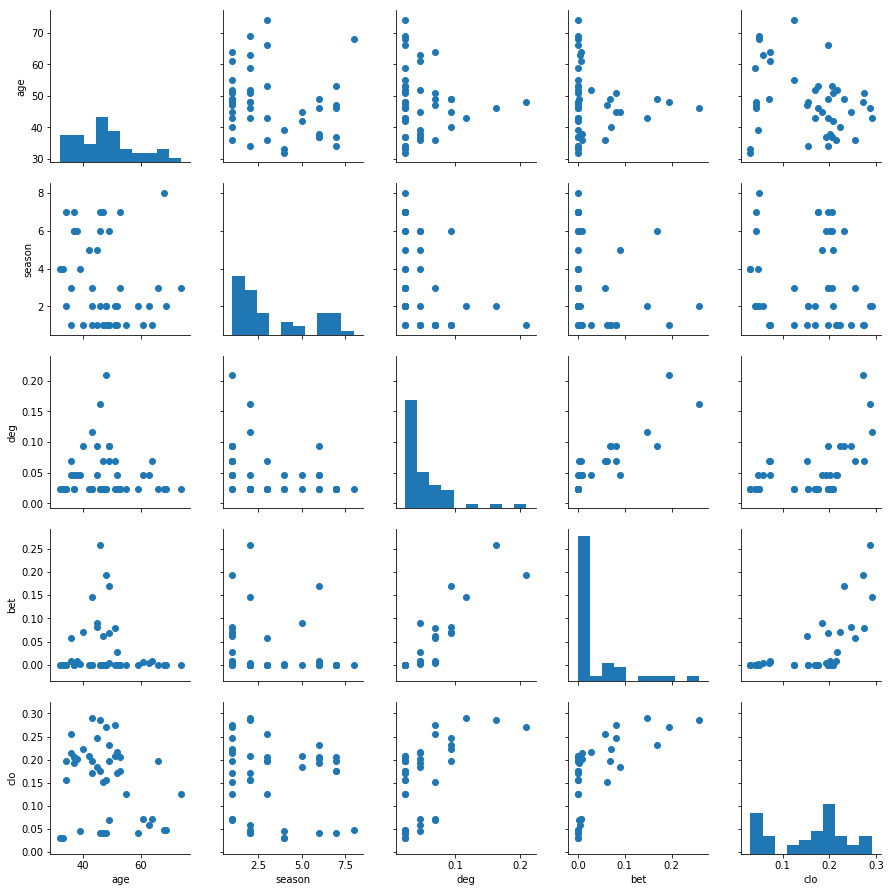

In [33]:
g = sb.PairGrid(gadf.drop('year',axis = 1))
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

7b. Calculate correlation matrix dropping the 'year' column

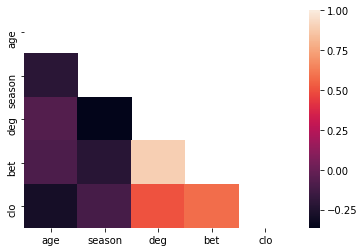

In [37]:
ga_corr = gadf.drop('year', axis=1).corr()

mask = np.zeros_like(ga_corr)
mask[np.triu_indices_from(mask)] = 1
sb.heatmap(ga_corr, mask = mask)

8a. Calculate value counts for each position.

In [38]:
gadf.position.value_counts()

Attending    14
Non-Staff    12
Resident      9
Intern        3
Nurse         2
Chief         2
Other         2
Name: position, dtype: int64

8b. Calculate value counts for the different races.

In [39]:
gadf.race.value_counts()

White    32
Black     8
Other     4
Name: race, dtype: int64

8c. Compute a crosstab of race and position.

In [40]:
pd.crosstab(gadf['race'], gadf['position'])

position,Attending,Chief,Intern,Non-Staff,Nurse,Other,Resident
race,,,,,,,
Black,2,1,0,2,1,1,1
Other,2,0,0,1,0,0,1
White,10,1,3,9,1,1,7


9a. Create monogamous vs non-monogamous column 
Remember that the degree distribution value is normalized by its maximum value: n-1.

In [49]:
mon = gadf['deg'] < 2.0 / (ga.number_of_nodes() - 1)
gadf['mon'] = mon

9b. Create a crosstab Sex vs Monogamy

In [50]:
pd.crosstab(gadf['sex'], gadf['mon'])

mon,False,True
sex,,
F,12,11
M,8,13


10. Plot Age vs Male/Female with Monogamous / Non-monogamous different colors. Use jitter to make the points easier to see.

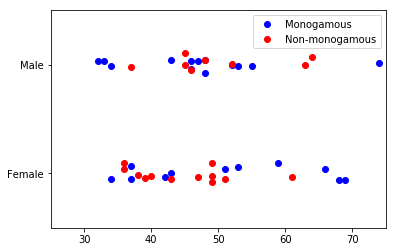

In [63]:
ga_sex_bool = gadf['sex'] == 'M'
                #this creates a slice, using te boolean gadf['mon']

ga_sex_jitter = ga_sex_bool + sp.random.normal(0,0.05, len(ga_sex_bool))
    
    
ga_age_mon = gadf['age'][gadf['mon']]
ga_sex_mon = ga_sex_jitter[gadf['mon']]

plt.plot(ga_age_mon, ga_sex_mon, 'ob')

ga_age_nmon = gadf['age'][~gadf['mon']]
ga_sex_nmon = ga_sex_jitter[~gadf['mon']]

plt.plot(ga_age_nmon, ga_sex_nmon, 'or')

plt.ylim(-0.5, 1.5)
plt.xlim(25,75)
plt.yticks([0.0, 1.0], ['Female', 'Male'])
#based on the order that we plotted them in
plt.legend(['Monogamous', 'Non-monogamous'])


Extra credit: Create a scatterplot of the Age / Closeness values with the monogamous points blue and the non-monogamous ones as red.

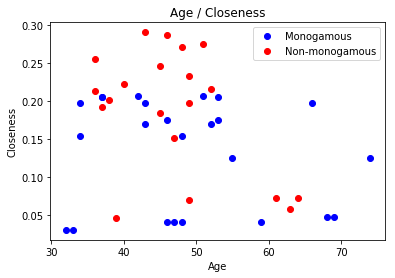

In [73]:
ga_age_mon = gadf['age'][gadf['mon']]
ga_clo_mon = gadf['clo'][gadf['mon']]

plt.plot( ga_age_mon, ga_clo_mon , 'ob')

ga_age_mon = gadf['age'][~gadf['mon']]
ga_clo_mon = gadf['clo'][~gadf['mon']]


plt.plot( ga_age_mon, ga_clo_mon , 'or')
plt.title('Age / Closeness')
plt.ylabel('Closeness')
plt.xlabel('Age')
plt.legend(['Monogamous', 'Non-monogamous'])